In [1]:
import sys
from pathlib import Path
import re
import json
import copy
import math
import itertools
import random
import numpy as np
from scipy.stats import mode
import cv2
import imageio
from skimage.morphology import remove_small_objects
from matplotlib import pyplot as plt
sys.path.extend([
    '../../base',
    '../../'
])
from base.utils.mask_converter import MaskConverter

In [18]:
def plot_before_after(before, after, figsize=(10,10)):
    fig, axes = plt.subplots(1,2, figsize=figsize)
    axes[0].imshow(before); axes[1].imshow(after)

In [3]:
test_gt_path = '/home/sedm5660/Documents/Temp/Data/cancer_phenotype/17_A047-4463_153D+-+2017-05-11+09.40.22_TissueTrain_(1.00,30774,15012,3897,4556)_mask.png'
gt = imageio.imread(test_gt_path)

In [4]:
gt2 = copy.deepcopy(gt)
gt2[gt == 250] = 0
im2, contours, hierarchy = cv2.findContours(gt2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

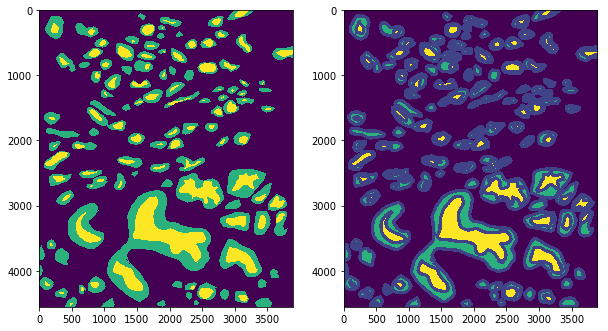

In [5]:
im2 = copy.deepcopy(gt)
cv2.drawContours(im2, contours, -1, 50, 50)
plot_before_after(gt, im2)

In [6]:
np.unique(gt)

Array([  0, 160, 250], dtype=uint8)

In [7]:
mask = copy.deepcopy(gt)

In [8]:
    converter = MaskConverter()

Binarization test

In [9]:
binary_mask = converter.binarize(mask)

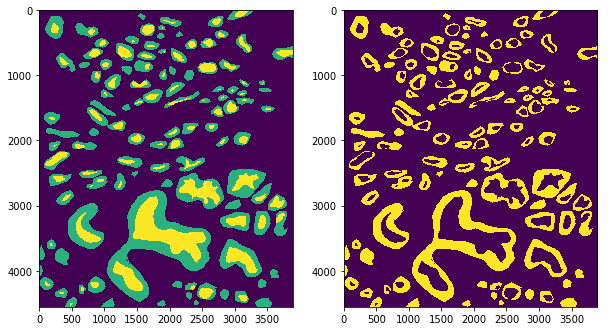

In [10]:
plot_before_after(mask, binary_mask)

Mask to labelled contours conversion test

In [11]:
contours, labels = converter.mask_to_contour(mask)

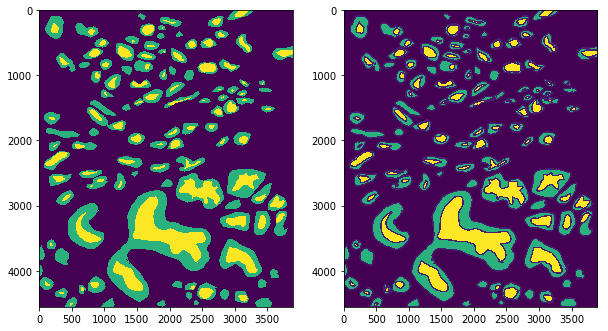

In [12]:
contoured_mask = copy.deepcopy(mask)
cv2.drawContours(contoured_mask, contours, -1, 20, 20)
plot_before_after(mask, contoured_mask)

In [20]:
# Print label near contour on mask for verification
contour_label_mask = copy.deepcopy(mask)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale, font_color, line_type = 5, 50, 4
label_hier=(0, (160, 200), 250)
for contour, label in zip(contours, labels):
    if label == label_hier[-1]:
        # if contour doesn't contain any other contours, write label in the middle
        moments = cv2.moments(contour)
        cx = round(moments['m10']/(moments['m00'] + 0.00001))
        cy = round(moments['m01']/(moments['m00'] + 0.00001))
        bottom_left_text_corner = (cx, cy)
    else:
        # else write it on a random point on contour
        bottom_left_text_corner = tuple(*random.sample(list(contour), 1)[0])
    cv2.putText(contour_label_mask, str(label), bottom_left_text_corner, 
                font, font_scale, font_color, line_type)

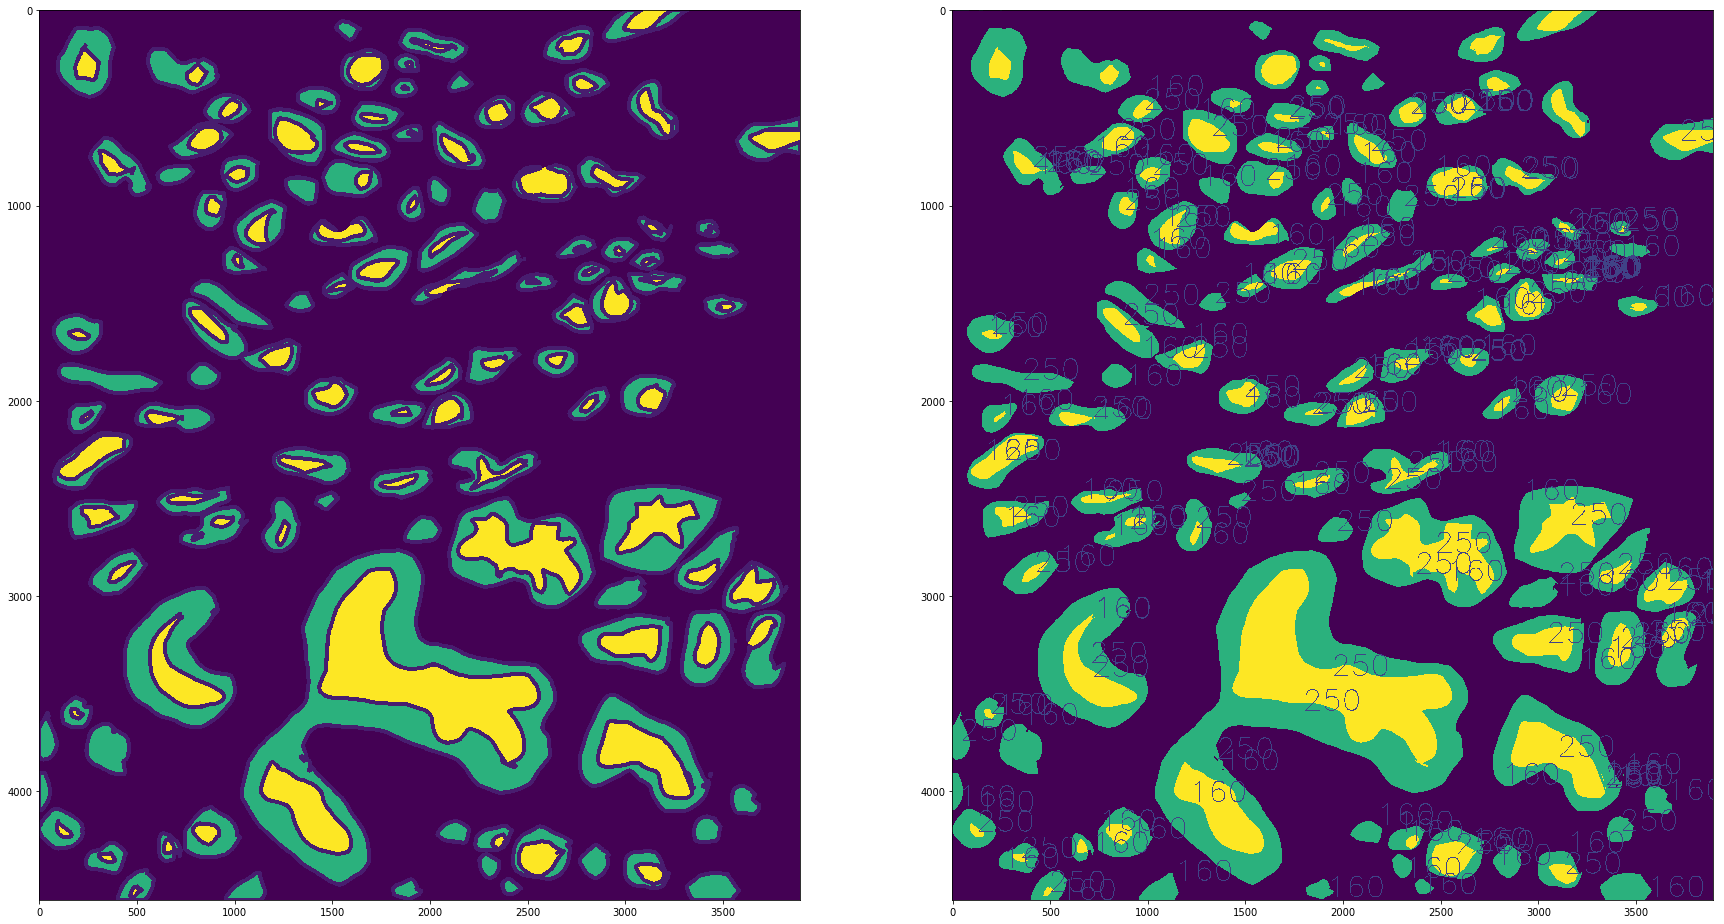

In [21]:
plot_before_after(contoured_mask, contour_label_mask, (30,30))